In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
s1 = pd.read_csv('season_(18,19).csv')
s2 = pd.read_csv("season_(19,20).csv")
s3 = pd.concat([s1,s2])
attack = s1[s1['Pos_x'] == 'FW']
forwards_1920 = set(attack.Player)
# forwards_1920
# print(len(forwards_1920),attack.columns)

In [3]:
s1

,Player,Nation_x,Pos_x,Age_x,MP,Min,Mn/MP,Min%,90s_x,Starts,...,Pressures_Att 3rd,Blocks_y,Blocks_Sh,Blocks_ShSv,Blocks_Pass,Int_y,Tkl+Int,Clr,Err,Season_y
0,Ederson,br BRA,GK,24.0,38,3420.0,90.0,100.0,38.0,38,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2018-2019
1,Aymeric Laporte,es ESP,DF,24.0,35,3057.0,87.0,89.4,34.0,34,...,12.0,30.0,10.0,0.0,20.0,20.0,64.0,144.0,0.0,2018-2019
2,Bernardo Silva,pt POR,"MF,FW",23.0,36,2854.0,79.0,83.5,31.7,31,...,272.0,53.0,3.0,0.0,50.0,30.0,88.0,22.0,1.0,2018-2019
3,Raheem Sterling,eng ENG,FW,23.0,34,2771.0,82.0,81.0,30.8,31,...,177.0,36.0,1.0,0.0,35.0,22.0,53.0,7.0,0.0,2018-2019
4,Sergio Agüero,ar ARG,FW,30.0,33,2459.0,75.0,71.9,27.3,31,...,257.0,19.0,5.0,0.0,14.0,11.0,28.0,2.0,0.0,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Matty Daly,eng ENG,MF,17.0,2,75.0,38.0,2.2,0.8,0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-2019
611,Collin Quaner,de GER,"FW,MF",27.0,2,39.0,20.0,1.1,0.4,0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-2019
612,Ryan Schofield,eng ENG,GK,18.0,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,Squad Total,NaN,NaN,26.2,38,3420.0,90.0,100.0,38.0,418,...,1383.0,631.0,134.0,4.0,497.0,562.0,1321.0,855.0,8.0,2018-2019


In [4]:
attack_features_1819 = attack[['Player','Standard_Gls','Standard_Sh','Standard_SoT','Standard_SoT%','Standard_Sh/90','Standard_SoT/90','Standard_G/Sh','Standard_G/SoT','Standard_Dist','Standard_FK','Standard_PK','Standard_PKatt','Expected_xG_y','Expected_npxG_y','Expected_npxG/Sh','Expected_G-xG','Expected_np:G-xG','SCA'
,'SCA_SCA90'
,'SCA Types_PassLive'
,'SCA Types_PassDead'
,'SCA Types_Drib'
,'SCA Types_Sh'
,'SCA Types_Fld'
,'SCA Types_Def'
,'GCA'
,'GCA_GCA90'
,'GCA_PassLive'
,'GCA_PassDead'
,'GCA_Drib'
,'GCA_Sh'
,'GCA_Fld'
,'GCA_Def']]

In [5]:
attack_features_1920 = attack[['Player','Standard_Gls','Standard_Sh','Standard_SoT','Standard_SoT%','Standard_Sh/90','Standard_SoT/90','Standard_G/Sh','Standard_G/SoT','Standard_Dist','Standard_FK','Standard_PK','Standard_PKatt','Expected_xG_y','Expected_npxG_y','Expected_npxG/Sh','Expected_G-xG','Expected_np:G-xG','SCA'
,'SCA_SCA90'
,'SCA Types_PassLive'
,'SCA Types_PassDead'
,'SCA Types_Drib'
,'SCA Types_Sh'
,'SCA Types_Fld'
,'SCA Types_Def'
,'GCA'
,'GCA_GCA90'
,'GCA_PassLive'
,'GCA_PassDead'
,'GCA_Drib'
,'GCA_Sh'
,'GCA_Fld'
,'GCA_Def']]

In [6]:
attack_features_1920.replace([np.inf, -np.inf], 0)
attack_features_1920.fillna(0)
attack_features_1920.reset_index(drop =True)

,Player,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,...,SCA Types_Fld,SCA Types_Def,GCA,GCA_GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def
0,Raheem Sterling,17.0,76.0,37.0,48.7,2.47,1.20,0.22,0.46,13.6,...,10.0,0.0,26.0,0.84,18.0,0.0,4.0,0.0,4.0,0.0
1,Sergio Agüero,21.0,113.0,41.0,36.3,4.14,1.50,0.17,0.46,14.2,...,7.0,1.0,17.0,0.62,12.0,0.0,2.0,1.0,2.0,0.0
2,Leroy Sané,10.0,56.0,24.0,42.9,2.70,1.16,0.18,0.42,16.6,...,2.0,0.0,14.0,0.67,12.0,0.0,2.0,0.0,0.0,0.0
3,Gabriel Jesus,7.0,41.0,22.0,53.7,3.56,1.91,0.15,0.27,11.1,...,1.0,0.0,6.0,0.52,5.0,0.0,0.0,1.0,0.0,0.0
4,Mohamed Salah,22.0,134.0,59.0,44.0,3.71,1.63,0.14,0.32,16.5,...,14.0,0.0,17.0,0.47,6.0,1.0,2.0,3.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Steve Mounié,2.0,62.0,22.0,35.5,3.14,1.11,0.03,0.09,13.7,...,3.0,0.0,4.0,0.20,3.0,0.0,0.0,0.0,1.0,0.0
70,Laurent Depoitre,0.0,34.0,7.0,20.6,2.87,0.59,0.00,0.00,11.0,...,2.0,0.0,1.0,0.08,1.0,0.0,0.0,0.0,0.0,0.0
71,Karlan Grant,3.0,21.0,10.0,47.6,2.16,1.03,0.14,0.30,15.9,...,1.0,0.0,2.0,0.21,0.0,0.0,0.0,1.0,1.0,0.0
72,Aaron Rowe,0.0,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
attack_features_1920.Player.value_counts()
attack_features_1920[attack_features_1920['Player'] == 'Oumar Niasse']
attack_features_1920 = attack_features_1920.set_index('Player')

In [8]:
# print(attack_features.loc['Oumar Niasse'].sum().shape)
# print(attack_features.loc('Oumar Niasse'))
tot = list(attack_features_1920.loc['Oumar Niasse'].sum())
print(tot)
# attack_features.loc[df_length] = to_append
# attack_features.loc['Oumar Niasse']
update_df = attack_features_1920.drop('Oumar Niasse')
update_df.loc['Oumar Niasse'] = tot

update_df

[0.0, 20.0, 7.0, 68.6, 5.93, 2.01, 0.0, 0.0, 23.200000000000003, 0.0, 0.0, 0.0, 3.5, 3.5, 0.36, -3.5, -3.5, 19.0, 3.17, 11.0, 0.0, 4.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,...,SCA Types_Fld,SCA Types_Def,GCA,GCA_GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def
Player,,,,,,,,,,,,,,,,,,,,,
Raheem Sterling,17.0,76.0,37.0,48.7,2.47,1.20,0.22,0.46,13.6,1.0,...,10.0,0.0,26.0,0.84,18.0,0.0,4.0,0.0,4.0,0.0
Sergio Agüero,21.0,113.0,41.0,36.3,4.14,1.50,0.17,0.46,14.2,3.0,...,7.0,1.0,17.0,0.62,12.0,0.0,2.0,1.0,2.0,0.0
Leroy Sané,10.0,56.0,24.0,42.9,2.70,1.16,0.18,0.42,16.6,5.0,...,2.0,0.0,14.0,0.67,12.0,0.0,2.0,0.0,0.0,0.0
Gabriel Jesus,7.0,41.0,22.0,53.7,3.56,1.91,0.15,0.27,11.1,0.0,...,1.0,0.0,6.0,0.52,5.0,0.0,0.0,1.0,0.0,0.0
Mohamed Salah,22.0,134.0,59.0,44.0,3.71,1.63,0.14,0.32,16.5,3.0,...,14.0,0.0,17.0,0.47,6.0,1.0,2.0,3.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laurent Depoitre,0.0,34.0,7.0,20.6,2.87,0.59,0.00,0.00,11.0,0.0,...,2.0,0.0,1.0,0.08,1.0,0.0,0.0,0.0,0.0,0.0
Karlan Grant,3.0,21.0,10.0,47.6,2.16,1.03,0.14,0.30,15.9,0.0,...,1.0,0.0,2.0,0.21,0.0,0.0,0.0,1.0,1.0,0.0
Aaron Rowe,0.0,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preparation

I have prepared a final Dataframe by merging all the tables into on which contains stats of all the players in every postion. The predictive Analysis here is on the players in Attacking position/Forward so we extracted the columns from the shooting statistics and goal and shot creation tables and the playes who play in position "FW".

In [9]:
update_df.fillna(0)
# update_df.sort_values(by=['Standard_Sh'])
update_df.isnull().sum(axis = 0)
for i in update_df.columns:
    update_df[i].fillna(0, inplace = True)

update_df.isnull().sum(axis = 0)


Standard_Gls          0
Standard_Sh           0
Standard_SoT          0
Standard_SoT%         0
Standard_Sh/90        0
Standard_SoT/90       0
Standard_G/Sh         0
Standard_G/SoT        0
Standard_Dist         0
Standard_FK           0
Standard_PK           0
Standard_PKatt        0
Expected_xG_y         0
Expected_npxG_y       0
Expected_npxG/Sh      0
Expected_G-xG         0
Expected_np:G-xG      0
SCA                   0
SCA_SCA90             0
SCA Types_PassLive    0
SCA Types_PassDead    0
SCA Types_Drib        0
SCA Types_Sh          0
SCA Types_Fld         0
SCA Types_Def         0
GCA                   0
GCA_GCA90             0
GCA_PassLive          0
GCA_PassDead          0
GCA_Drib              0
GCA_Sh                0
GCA_Fld               0
GCA_Def               0
dtype: int64

### I cleaned the data by replacing all the NaN, -inf,inf with 0.

In [10]:
update_df.sort_values(by=['Standard_Gls'],ascending=False)
top_10_goal_scorers = update_df.head(10)
top_10_goal_scorers.isnull().sum(axis = 0)

Standard_Gls          0
Standard_Sh           0
Standard_SoT          0
Standard_SoT%         0
Standard_Sh/90        0
Standard_SoT/90       0
Standard_G/Sh         0
Standard_G/SoT        0
Standard_Dist         0
Standard_FK           0
Standard_PK           0
Standard_PKatt        0
Expected_xG_y         0
Expected_npxG_y       0
Expected_npxG/Sh      0
Expected_G-xG         0
Expected_np:G-xG      0
SCA                   0
SCA_SCA90             0
SCA Types_PassLive    0
SCA Types_PassDead    0
SCA Types_Drib        0
SCA Types_Sh          0
SCA Types_Fld         0
SCA Types_Def         0
GCA                   0
GCA_GCA90             0
GCA_PassLive          0
GCA_PassDead          0
GCA_Drib              0
GCA_Sh                0
GCA_Fld               0
GCA_Def               0
dtype: int64

## I scaled the data to perform Principal component analysis on the data to find the important attributes which can be the used in a pipeline with PCA first hten using K-means to find clusters in player pool.

In [11]:
df_z_scaled = top_10_goal_scorers.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    if df_z_scaled[column].std() != 0:
        df_z_scaled[column] = (df_z_scaled[column] -df_z_scaled[column].mean()) / df_z_scaled[column].std()   

print(df_z_scaled)

                 Standard_Gls  Standard_Sh  Standard_SoT  Standard_SoT%  \
Player                                                                    
Raheem Sterling      0.538925     0.079381      0.338176       0.793068   
Sergio Agüero        1.064705     1.128345      0.603413      -1.426806   
Leroy Sané          -0.381191    -0.487626     -0.523842      -0.245260   
Gabriel Jesus       -0.775526    -0.912882     -0.656460       1.688178   
Mohamed Salah        1.196150     1.723703      1.796976      -0.048336   
Sadio Mané           1.196150     0.476286      0.802340       0.828872   
Divock Origi        -1.301306    -1.706692     -1.717405       0.345513   
Eden Hazard          0.407480     0.476286      0.537103       0.023273   
Willian             -1.301306    -0.317524     -0.656460      -1.570023   
Pedro               -0.644081    -0.459276     -0.523842      -0.388478   

                 Standard_Sh/90  Standard_SoT/90  Standard_G/Sh  \
Player                          

In [12]:
update_df

,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,...,SCA Types_Fld,SCA Types_Def,GCA,GCA_GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def
Player,,,,,,,,,,,,,,,,,,,,,
Raheem Sterling,17.0,76.0,37.0,48.7,2.47,1.20,0.22,0.46,13.6,1.0,...,10.0,0.0,26.0,0.84,18.0,0.0,4.0,0.0,4.0,0.0
Sergio Agüero,21.0,113.0,41.0,36.3,4.14,1.50,0.17,0.46,14.2,3.0,...,7.0,1.0,17.0,0.62,12.0,0.0,2.0,1.0,2.0,0.0
Leroy Sané,10.0,56.0,24.0,42.9,2.70,1.16,0.18,0.42,16.6,5.0,...,2.0,0.0,14.0,0.67,12.0,0.0,2.0,0.0,0.0,0.0
Gabriel Jesus,7.0,41.0,22.0,53.7,3.56,1.91,0.15,0.27,11.1,0.0,...,1.0,0.0,6.0,0.52,5.0,0.0,0.0,1.0,0.0,0.0
Mohamed Salah,22.0,134.0,59.0,44.0,3.71,1.63,0.14,0.32,16.5,3.0,...,14.0,0.0,17.0,0.47,6.0,1.0,2.0,3.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laurent Depoitre,0.0,34.0,7.0,20.6,2.87,0.59,0.00,0.00,11.0,0.0,...,2.0,0.0,1.0,0.08,1.0,0.0,0.0,0.0,0.0,0.0
Karlan Grant,3.0,21.0,10.0,47.6,2.16,1.03,0.14,0.30,15.9,0.0,...,1.0,0.0,2.0,0.21,0.0,0.0,0.0,1.0,1.0,0.0
Aaron Rowe,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
scalar = StandardScaler()

scaled_data = scalar.fit_transform(update_df)
scaled_data

array([[ 1.72826994,  1.07268469,  1.5089678 , ..., -0.51629596,
         2.86363636, -0.28388749],
       [ 2.34976602,  2.1390525 ,  1.78731183, ...,  0.93330423,
         1.20454545, -0.28388749],
       [ 0.64065179,  0.49626966,  0.60434971, ..., -0.51629596,
        -0.45454545, -0.28388749],
       ...,
       [-0.91308843, -1.11769244, -1.06571447, ..., -0.51629596,
        -0.45454545, -0.28388749],
       [-0.91308843, -1.11769244, -1.06571447, ..., -0.51629596,
        -0.45454545, -0.28388749],
       [-0.91308843, -0.54127741, -0.57861242, ..., -0.51629596,
        -0.45454545, -0.28388749]])

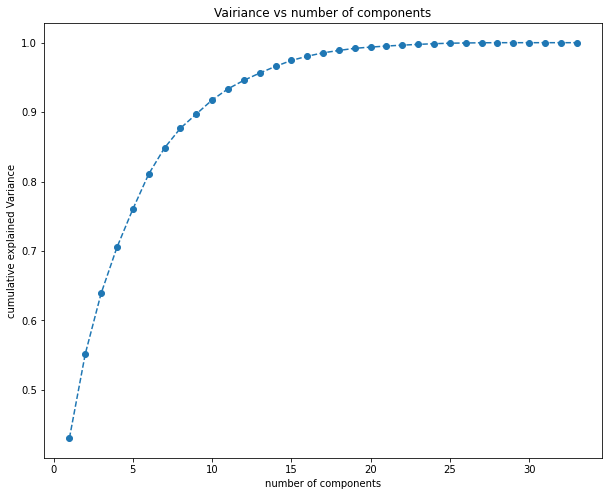

In [14]:
pca = PCA()
pca.fit(scaled_data)

fig = plt.figure(figsize = (10,8))
fig = plt.plot(range(1,34),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
fig = plt.title('Vairiance vs number of components')
fig = plt.xlabel('number of components')
fig = plt.ylabel('cumulative explained Variance')

## Top attributes that affect the cluster detection

Standard_Gls :  [0.4306540732862186]
Standard_Sh :  [0.12128322103300614]
Standard_SoT :  [0.08709712056554325]
Standard_SoT% :  [0.06640614145095519]
Standard_Sh/90 :  [0.054868904227955824]
Standard_SoT/90 :  [0.05050636305445563]
Standard_G/Sh :  [0.03764688628111206]
Standard_G/SoT :  [0.028302432501199137]
Standard_Dist :  [0.02042606107350542]
Standard_FK :  [0.020279152897375974]


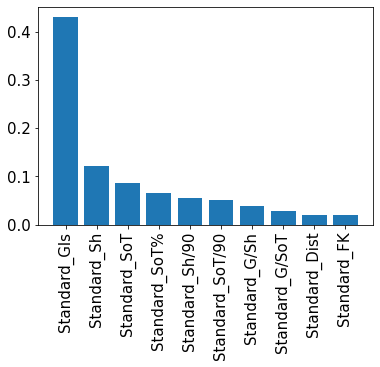

In [15]:
keys = list(update_df.columns)
vals = pca.explained_variance_ratio_

Dict = {keys[i]: vals[i] for i in range(len(keys))}
a = sorted(Dict.items(), key=lambda x: x[1], reverse=True) 

top_attributes = a[:10]
temp = {}
# print(top_attributes)
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di

temp = Convert(top_attributes, temp)

for k,v in temp.items():
    print(k,': ',v)
matplotlib.rcParams.update({'font.size': 15})
plt.bar(range(len(top_attributes)), [val[1] for val in top_attributes], align='center')
plt.xticks(range(len(top_attributes)), [val[0] for val in top_attributes])
plt.xticks(rotation=90)
plt.show()

## Performing PCA using 8 components and getting a transformed data frame.

In [16]:
pca = PCA(n_components = 8)
pca.fit(scaled_data)

transformed_df = pca.transform(scaled_data)


## 

In [17]:
wcss = []
for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(transformed_df)
    wcss.append(kmeans_pca.inertia_)

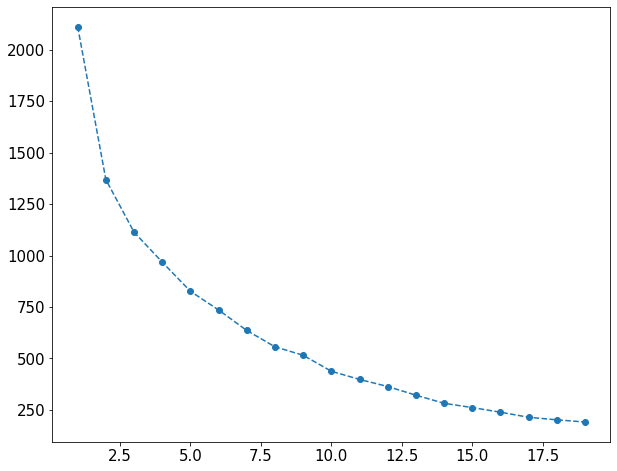

In [18]:
fig = plt.figure(figsize=(10,8))
fig = plt.plot(range(1,20),wcss,marker = 'o', linestyle = '--')

In [19]:
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
kmeans_pca.fit(transformed_df)

KMeans(n_clusters=6, random_state=42)

In [20]:
df_seg = pd.concat([update_df.reset_index(drop=False),pd.DataFrame(transformed_df)],axis =1)
df_seg.columns.values[-8:] = ['cmpt_1','cmpt_2','cmpt_3','cmpt_4','cmpt_45','cmpt_6','cmpt_7','cmpt_8']
df_seg['labels'] = kmeans_pca.labels_

df_seg.labels.value_counts()

0    26
5    21
1    13
2    11
4     1
3     1
Name: labels, dtype: int64

In [21]:
df_seg

,Player,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,...,GCA_Def,cmpt_1,cmpt_2,cmpt_3,cmpt_4,cmpt_45,cmpt_6,cmpt_7,cmpt_8,labels
0,Raheem Sterling,17.0,76.0,37.0,48.7,2.47,1.20,0.22,0.46,13.6,...,0.0,8.315280,1.639427,-0.481472,-2.173504,-2.417541,-1.704775,-0.616529,-1.501295,1
1,Sergio Agüero,21.0,113.0,41.0,36.3,4.14,1.50,0.17,0.46,14.2,...,0.0,6.797824,-1.506888,-0.704123,1.164757,0.276333,-0.540271,-0.970996,-0.875498,1
2,Leroy Sané,10.0,56.0,24.0,42.9,2.70,1.16,0.18,0.42,16.6,...,0.0,3.817833,0.947436,-0.253483,-3.793219,0.276629,0.202211,-0.751588,-0.773357,1
3,Gabriel Jesus,7.0,41.0,22.0,53.7,3.56,1.91,0.15,0.27,11.1,...,0.0,1.472082,-1.126698,1.927081,1.463895,-0.889332,-0.965833,-0.749753,1.046167,0
4,Mohamed Salah,22.0,134.0,59.0,44.0,3.71,1.63,0.14,0.32,16.5,...,0.0,10.280160,0.067630,-1.128752,1.560066,1.489599,-3.082863,-0.264742,0.276354,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Laurent Depoitre,0.0,34.0,7.0,20.6,2.87,0.59,0.00,0.00,11.0,...,0.0,-2.771705,0.761014,1.441584,1.942882,0.330483,-0.625032,-0.868806,0.136085,0
69,Karlan Grant,3.0,21.0,10.0,47.6,2.16,1.03,0.14,0.30,15.9,...,0.0,-0.778404,-0.490422,0.256935,-0.653391,-0.824708,-0.452664,-0.291318,0.879979,0
70,Aaron Rowe,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,-4.095219,2.466866,-2.116764,0.258583,0.324828,-0.274918,0.094741,-0.224477,2
71,Abdelhamid Sabiri,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,-4.200442,2.270518,-2.265984,0.246530,0.382118,-0.267017,0.111905,-0.330726,2


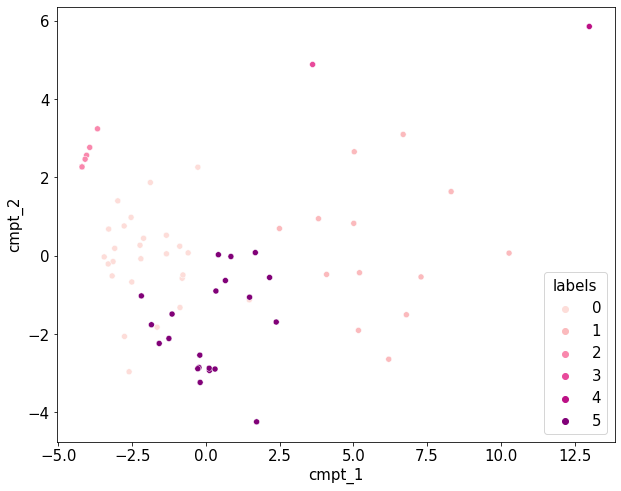

In [22]:
x = df_seg['cmpt_1']
y = df_seg['cmpt_2']

sequential_colors = sns.color_palette("RdPu", 6)
fig = plt.figure(figsize=(10,8))
fig = sns.scatterplot(x,y,hue = df_seg['labels'],palette= sequential_colors)

In [23]:
grps = df_seg.groupby(['labels'])

for i in range(6):
    print('set-',i,"\n",set(grps.get_group(i).Player),"\n\n")

set- 0 
 {'Oumar Niasse', 'Callum Hudson-Odoi', 'Christian Benteke', 'Jermain Defoe', 'Dominic Solanke', 'Olivier Giroud', 'Fernando Llorente', 'Gonzalo Higuaín', 'Laurent Depoitre', 'Tahith Chong', 'Peter Crouch', 'Vincent Janssen', 'Steve Mounié', 'Andy Carroll', 'Gabriel Jesus', 'Kenneth Zohore', 'Karlan Grant', 'Connor Wickham', 'Jordan Ayew', 'Léo Bonatini', 'Álvaro Morata', 'Cenk Tosun', 'Danny Ward', 'Stefano Okaka', 'Charlie Austin', 'Joselu'} 


set- 1 
 {'Gerard Deulofeu', 'Callum Wilson', 'Mohamed Salah', 'Aleksandar Mitrović', 'Danny Ings', 'Wilfried Zaha', 'Raheem Sterling', 'Jamie Vardy', 'Pierre-Emerick Aubameyang', 'Leroy Sané', 'Alexandre Lacazette', 'Sadio Mané', 'Sergio Agüero'} 


set- 2 
 {'Lazar Marković', 'Aaron Rowe', 'Fousseni Diabaté', 'Abdelhamid Sabiri', 'Victor Moses', 'Kazaiah Sterling', "Georges-Kévin N'Koudou", 'Denis Suárez', 'Tyreke Johnson', 'Bukayo Saka', 'Sandro Ramírez'} 


set- 3 
 {'Willian'} 


set- 4 
 {'Eden Hazard'} 


set- 5 
 {'Javier Herná

In [24]:
# Thop_attac = set(grps.get_group(4).Player).union(set(grps.get_group(2).Player))
# med_attac = set(grps.get_group(0).Player).union(set(grps.get_group(1).Player))
# losers = set(grps.get_group(3).Player)

# print(Thop_attac,"\n\n",med_attac,"\n\n",losers)

grps.get_group(2)

,Player,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,...,GCA_Def,cmpt_1,cmpt_2,cmpt_3,cmpt_4,cmpt_45,cmpt_6,cmpt_7,cmpt_8,labels
14,Victor Moses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-3.675466,3.243157,-1.543151,0.318651,0.092912,-0.338215,0.052443,0.199544,2
18,Georges-Kévin N'Koudou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.200442,2.270518,-2.265984,0.246530,0.382118,-0.267017,0.111905,-0.330726,2
19,Kazaiah Sterling,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.200442,2.270518,-2.265984,0.246530,0.382118,-0.267017,0.111905,-0.330726,2
22,Denis Suárez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.200442,2.270518,-2.265984,0.246530,0.382118,-0.267017,0.111905,-0.330726,2
23,Bukayo Saka,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.200442,2.270518,-2.265984,0.246530,0.382118,-0.267017,0.111905,-0.330726,2
33,Sandro Ramírez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.200442,2.270518,-2.265984,0.246530,0.382118,-0.267017,0.111905,-0.330726,2
35,Fousseni Diabaté,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-3.938818,2.767711,-1.886306,0.278147,0.235970,-0.285317,0.069012,-0.060059,2
59,Tyreke Johnson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.200442,2.270518,-2.265984,0.246530,0.382118,-0.267017,0.111905,-0.330726,2
66,Lazar Marković,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.046144,2.567068,-2.038864,0.265785,0.294557,-0.277314,0.086528,-0.168698,2
70,Aaron Rowe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.095219,2.466866,-2.116764,0.258583,0.324828,-0.274918,0.094741,-0.224477,2


In [25]:
df_seg = df_seg.set_index('Player')

In [26]:
df_seg

,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,...,GCA_Def,cmpt_1,cmpt_2,cmpt_3,cmpt_4,cmpt_45,cmpt_6,cmpt_7,cmpt_8,labels
Player,,,,,,,,,,,,,,,,,,,,,
Raheem Sterling,17.0,76.0,37.0,48.7,2.47,1.20,0.22,0.46,13.6,1.0,...,0.0,8.315280,1.639427,-0.481472,-2.173504,-2.417541,-1.704775,-0.616529,-1.501295,1
Sergio Agüero,21.0,113.0,41.0,36.3,4.14,1.50,0.17,0.46,14.2,3.0,...,0.0,6.797824,-1.506888,-0.704123,1.164757,0.276333,-0.540271,-0.970996,-0.875498,1
Leroy Sané,10.0,56.0,24.0,42.9,2.70,1.16,0.18,0.42,16.6,5.0,...,0.0,3.817833,0.947436,-0.253483,-3.793219,0.276629,0.202211,-0.751588,-0.773357,1
Gabriel Jesus,7.0,41.0,22.0,53.7,3.56,1.91,0.15,0.27,11.1,0.0,...,0.0,1.472082,-1.126698,1.927081,1.463895,-0.889332,-0.965833,-0.749753,1.046167,0
Mohamed Salah,22.0,134.0,59.0,44.0,3.71,1.63,0.14,0.32,16.5,3.0,...,0.0,10.280160,0.067630,-1.128752,1.560066,1.489599,-3.082863,-0.264742,0.276354,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laurent Depoitre,0.0,34.0,7.0,20.6,2.87,0.59,0.00,0.00,11.0,0.0,...,0.0,-2.771705,0.761014,1.441584,1.942882,0.330483,-0.625032,-0.868806,0.136085,0
Karlan Grant,3.0,21.0,10.0,47.6,2.16,1.03,0.14,0.30,15.9,0.0,...,0.0,-0.778404,-0.490422,0.256935,-0.653391,-0.824708,-0.452664,-0.291318,0.879979,0
Aaron Rowe,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,-4.095219,2.466866,-2.116764,0.258583,0.324828,-0.274918,0.094741,-0.224477,2


In [27]:
X,y = df_seg[df_seg.columns[:-9]], df_seg[df_seg.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_test

Player
Mohamed Salah             1
Danny Ward                0
Georges-Kévin N'Koudou    2
Raheem Sterling           1
Raúl Jiménez              5
Oumar Niasse              0
Gonzalo Higuaín           0
Jamie Vardy               1
Olivier Giroud            0
Ashley Barnes             5
Ryan Babel                5
Dominic Calvert-Lewin     5
Pedro                     5
Jordan Ayew               0
Sadio Mané                1
Denis Suárez              2
Danny Ings                1
Joselu                    0
Sandro Ramírez            2
Andy Carroll              0
Aaron Rowe                2
Fernando Llorente         0
Fousseni Diabaté          2
Wilfried Zaha             1
Florin Andone             5
Name: labels, dtype: int32

In [28]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import tree

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred),y_test.values, y_pred)

Accuracy: 0.84 [1 0 2 1 5 0 0 1 0 5 5 5 5 0 1 2 1 0 2 0 2 0 2 1 5] [1 0 2 1 1 0 0 1 0 5 0 5 1 0 1 2 0 0 2 0 2 0 2 1 5]


[Text(697.5, 1223.1, 'Expected_G-xG <= 0.4\ngini = 0.724\nsamples = 48\nvalue = [18, 7, 6, 1, 1, 15]'),
 Text(380.45454545454544, 951.3, 'Standard_Sh <= 0.5\ngini = 0.561\nsamples = 29\nvalue = [18, 2, 6, 1, 0, 2]'),
 Text(253.63636363636363, 679.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6, 0, 0, 0]'),
 Text(507.27272727272725, 679.5, 'Standard_Gls <= 8.0\ngini = 0.371\nsamples = 23\nvalue = [18, 2, 0, 1, 0, 2]'),
 Text(253.63636363636363, 407.69999999999993, 'SCA Types_Fld <= 5.5\ngini = 0.1\nsamples = 19\nvalue = [18, 0, 0, 1, 0, 0]'),
 Text(126.81818181818181, 135.89999999999986, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0, 0]'),
 Text(380.45454545454544, 135.89999999999986, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(760.9090909090909, 407.69999999999993, 'Expected_npxG_y <= 11.8\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 0, 0, 0, 2]'),
 Text(634.090909090909, 135.89999999999986, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2]'),
 Text(887.727272727272

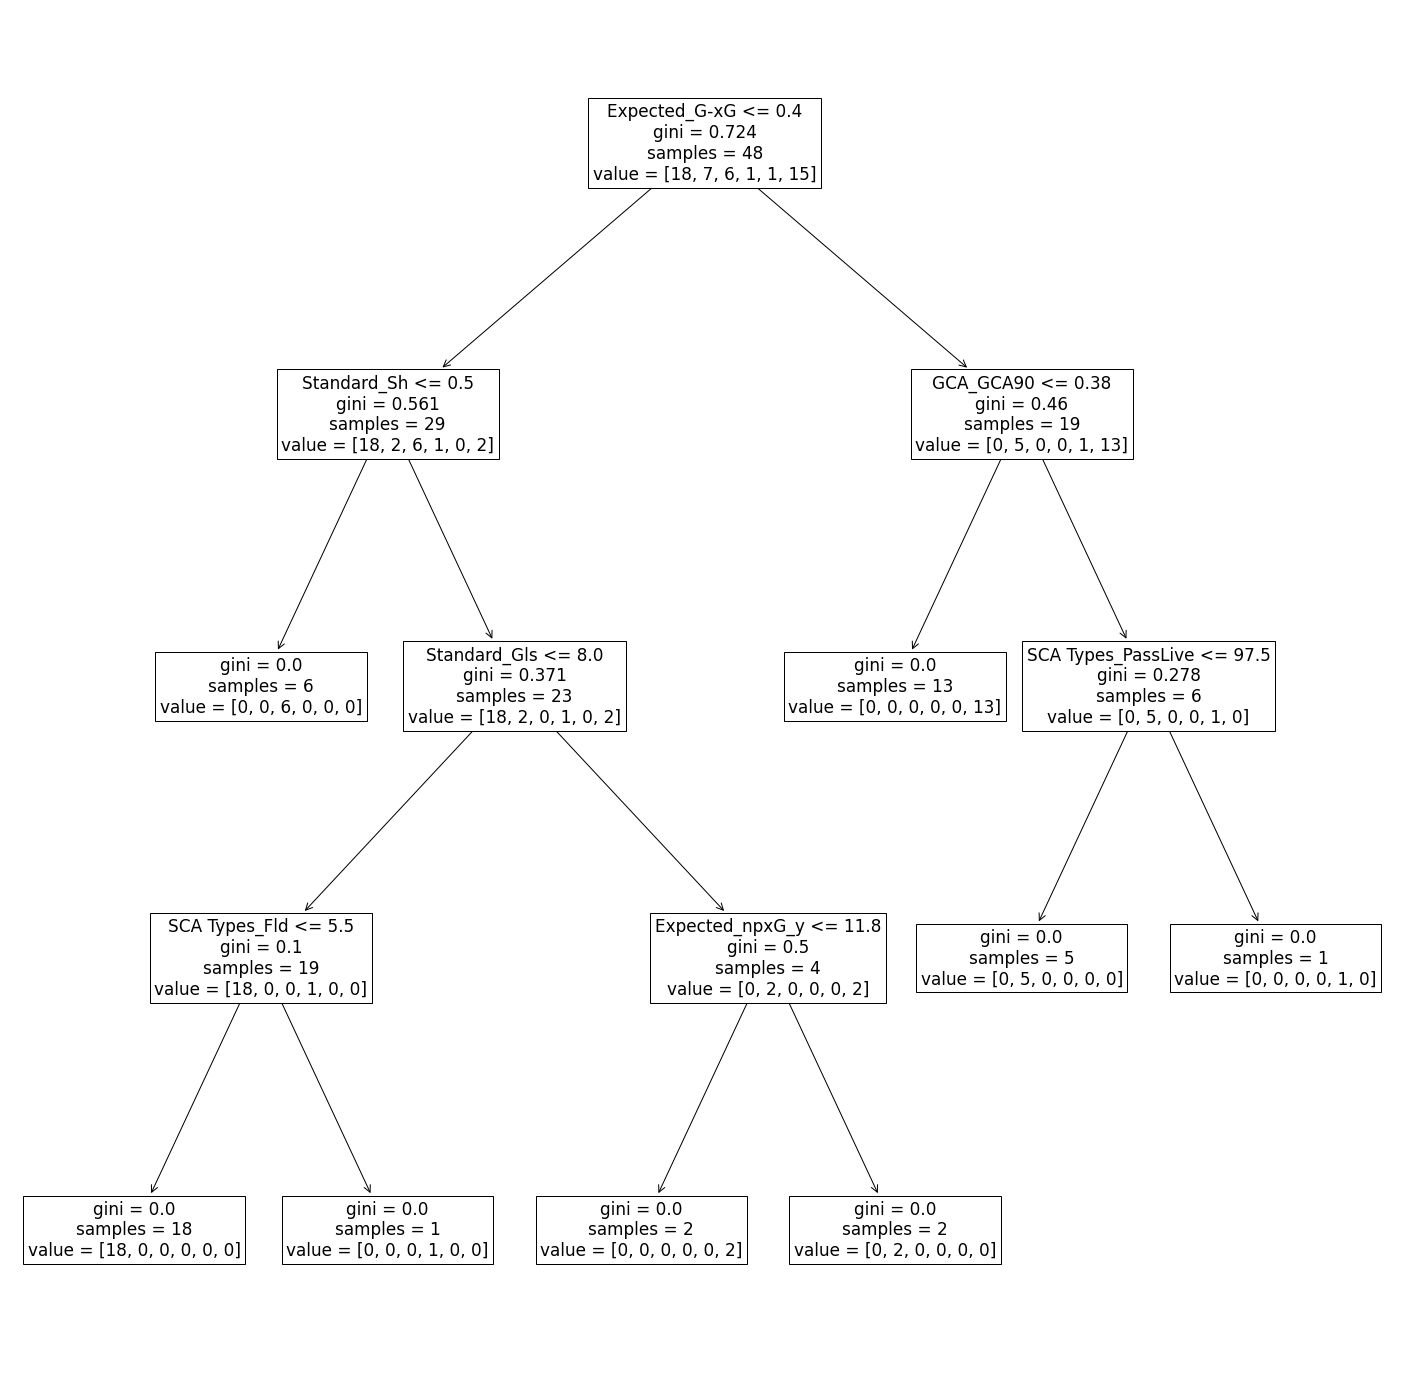

In [29]:
plt.figure(figsize=(25,25))
tree.plot_tree(clf,feature_names=df_seg.columns[:-9])

In [30]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_15 <= 0.40
|   |--- feature_1 <= 0.50
|   |   |--- class: 2
|   |--- feature_1 >  0.50
|   |   |--- feature_0 <= 8.00
|   |   |   |--- feature_23 <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_23 >  5.50
|   |   |   |   |--- class: 3
|   |   |--- feature_0 >  8.00
|   |   |   |--- feature_13 <= 11.80
|   |   |   |   |--- class: 5
|   |   |   |--- feature_13 >  11.80
|   |   |   |   |--- class: 1
|--- feature_15 >  0.40
|   |--- feature_26 <= 0.38
|   |   |--- class: 5
|   |--- feature_26 >  0.38
|   |   |--- feature_19 <= 97.50
|   |   |   |--- class: 1
|   |   |--- feature_19 >  97.50
|   |   |   |--- class: 4



In [31]:
list_att = ['Player','Pos_x','Expected_G-xG','Standard_Sh',
'Standard_SoT',
'SCA Types_Fld',
'SCA',
'GCA_GCA90',
'Standard_Dist',
'GCA','Standard_Gls']

In [32]:
Train = s3[list_att]
Train = Train[Train['Pos_x'] != 'GK']
Train

,Player,Pos_x,Expected_G-xG,Standard_Sh,Standard_SoT,SCA Types_Fld,SCA,GCA_GCA90,Standard_Dist,GCA,Standard_Gls
1,Aymeric Laporte,DF,0.8,25.0,7.0,0.0,39.0,0.21,16.4,7.0,3.0
2,Bernardo Silva,"MF,FW",0.4,63.0,22.0,2.0,120.0,0.38,14.9,12.0,7.0
3,Raheem Sterling,FW,3.2,76.0,37.0,10.0,131.0,0.84,13.6,26.0,17.0
4,Sergio Agüero,FW,1.4,113.0,41.0,7.0,72.0,0.62,14.2,17.0,21.0
5,Kyle Walker,DF,0.1,21.0,4.0,1.0,56.0,0.13,27.6,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
655,Jordan Thomas,FW,0.0,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.0
656,Daniel Adshead,MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,Philip Heise,"DF,MF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659,Squad Total,NaN,-13.0,409.0,124.0,33.0,651.0,1.00,17.4,38.0,25.0


In [33]:
Train = Train[(Train['Player'] != 'Squad Total') & (Train['Player'] != 'Opponent Total')]
y = Train['Standard_Gls']
X = Train[Train.columns[:-1]]
X = X.set_index('Player')

In [34]:
X = X.drop(['Pos_x'], axis=1)
X

,Expected_G-xG,Standard_Sh,Standard_SoT,SCA Types_Fld,SCA,GCA_GCA90,Standard_Dist,GCA
Player,,,,,,,,
Aymeric Laporte,0.8,25.0,7.0,0.0,39.0,0.21,16.4,7.0
Bernardo Silva,0.4,63.0,22.0,2.0,120.0,0.38,14.9,12.0
Raheem Sterling,3.2,76.0,37.0,10.0,131.0,0.84,13.6,26.0
Sergio Agüero,1.4,113.0,41.0,7.0,72.0,0.62,14.2,17.0
Kyle Walker,0.1,21.0,4.0,1.0,56.0,0.13,27.6,4.0
...,...,...,...,...,...,...,...,...
Patrick Roberts,0.0,0.0,0.0,1.0,1.0,0.00,NaN,0.0
Akin Famewo,0.0,0.0,0.0,0.0,0.0,0.00,NaN,0.0
Jordan Thomas,0.0,0.0,0.0,0.0,0.0,0.00,NaN,0.0


In [35]:
X['Standard_Dist'] = X['Standard_Dist'].fillna(X['Standard_Dist'].mean())
X = X.fillna(0)

In [36]:
y = y.fillna(0)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred = tree_reg.predict(X_test)

print("MSE: ", mean_squared_error(y_pred,y_test,squared=False))

print("MSA: ", mean_absolute_error(y_pred,y_test))

MSE:  1.383927106927289
MSA:  0.5819209039548022


In [40]:
tree_reg.feature_importances_

array([0.08080864, 0.01274852, 0.86085402, 0.00217935, 0.00515982,
       0.00551729, 0.02335478, 0.00937758])

In [41]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state = 42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
reg.feature_importances_

array([0.08782321, 0.04740966, 0.81892959, 0.00524442, 0.00664011,
       0.00606857, 0.02306898, 0.00481548])

In [43]:
X.columns

Index(['Expected_G-xG', 'Standard_Sh', 'Standard_SoT', 'SCA Types_Fld', 'SCA',
       'GCA_GCA90', 'Standard_Dist', 'GCA'],
      dtype='object')

In [44]:
from sklearn.metrics import mean_squared_error


y_pred = reg.predict(X_test)

print("MSE: ", mean_squared_error(y_pred,y_test,squared=False))

print("MSA: ", mean_absolute_error(y_pred,y_test))

MSE:  1.083758239140056
MSA:  0.48403954802259885


In [45]:
s_21 = pd.read_csv("season_(19,20).csv")

In [46]:
test= s3[list_att]
test = test[test['Pos_x'] != 'GK']
test

,Player,Pos_x,Expected_G-xG,Standard_Sh,Standard_SoT,SCA Types_Fld,SCA,GCA_GCA90,Standard_Dist,GCA,Standard_Gls
1,Aymeric Laporte,DF,0.8,25.0,7.0,0.0,39.0,0.21,16.4,7.0,3.0
2,Bernardo Silva,"MF,FW",0.4,63.0,22.0,2.0,120.0,0.38,14.9,12.0,7.0
3,Raheem Sterling,FW,3.2,76.0,37.0,10.0,131.0,0.84,13.6,26.0,17.0
4,Sergio Agüero,FW,1.4,113.0,41.0,7.0,72.0,0.62,14.2,17.0,21.0
5,Kyle Walker,DF,0.1,21.0,4.0,1.0,56.0,0.13,27.6,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
655,Jordan Thomas,FW,0.0,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.0
656,Daniel Adshead,MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,Philip Heise,"DF,MF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659,Squad Total,NaN,-13.0,409.0,124.0,33.0,651.0,1.00,17.4,38.0,25.0


In [51]:
test= test[(test['Player'] != 'Squad Total') & (test['Player'] != 'Opponent Total')]
y = test['Standard_Gls']
y.fillna(0,inplace = True)
X = test[Train.columns[:-1]]
X = X.set_index('Player')
X = X.drop(['Pos_x'], axis=1)
X['Standard_Dist'] = X['Standard_Dist'].fillna(X['Standard_Dist'].mean())
X = X.fillna(0)

array([[ 0.8       , 25.        ,  7.        , ...,  0.21      ,
        16.4       ,  7.        ],
       [ 0.4       , 63.        , 22.        , ...,  0.38      ,
        14.9       , 12.        ],
       [ 3.2       , 76.        , 37.        , ...,  0.84      ,
        13.6       , 26.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        17.02915215,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        17.02915215,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        17.02915215,  0.        ]])

In [56]:
y_pred = reg.predict(X)

print("MSE: ", mean_squared_error(y_pred,y,squared=False))
print("MSA: ", mean_absolute_error(y_pred,y))

MSE:  0.6949683902400423
MSA:  0.2840764925373135


In [58]:
y_pred = tree_reg.predict(X)

print("MSE: ", mean_squared_error(y_pred,y,squared=False))
print("MSA: ", mean_absolute_error(y_pred,y))

MSE:  0.7952752269291206
MSA:  0.1921641791044776
